<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2244/NGC_2244_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 8.9MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 2.6MB 35.5MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=09e6cfecda74a7a22660697c98e55e7073054092311957cd9f1156e542149958
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC2244 center

coordinate = coord.SkyCoord.from_name('NGC2244')
print(coordinate)
radius = u.Quantity(1.5, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (97.97916667, 4.94166667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 3131335693444052352,3131335693444052352,659493987,2015.5,97.978172,9.967009,4.940506,5.454954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,0,38,0,11.488217,239.458542,6.685602,14.628173,3,False,0.013427,NaN,NaN,-0.308688,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.306445,-2.073384,98.373117,-18.267182,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001526
1,1635721458409799680,Gaia DR2 3131335693440838400,3131335693440838400,216149652,2015.5,97.980384,0.062809,4.943135,0.080662,0.161289,0.123253,1.308609,-1.794845,0.125596,0.242008,0.103372,-0.438540,0.493487,0.246715,0.312420,-0.758702,-0.449349,-0.466748,0.669478,0.462585,0.118844,123,123,117,6,10.460493,351.405518,0.000000,1.940850,31,False,377.260559,1.756390,0.017545,-0.205275,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305128,-2.070216,98.375273,-18.264429,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001905
2,1635721458409799680,Gaia DR2 3131335693444047232,3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000,31,False,166.407257,1.705829,0.014366,-0.287584,...,1.882213e+07,57882.206962,325.179932,6.575248,1.162213,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305806,-2.069510,98.376277,-18.264650,100001,8515.000000,8277.333008,8597.0,0.573,0.337,0.7991,0.295,0.1819,0.3931,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002457
3,1635721458409799680,Gaia DR2 3131335689146178304,3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,2.143679e+05,243.291704,881.114807,11.434020,1.203961,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.308368,-2.072129,98.375289,-18.268190,100001,7718.000000,7304.000000,7951.5,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,https://gea.esac.esa.int/data-server/datalink/...,,0.002491
4,1635721458409799680,Gaia DR2 3131335689146178432,3131335689146178432,1113990004,2015.5,97.

##### Applying Filter:

In [6]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [8]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [9]:
all_stars_filtered.shape

(34554, 99)

##### Visualizing GAIA data

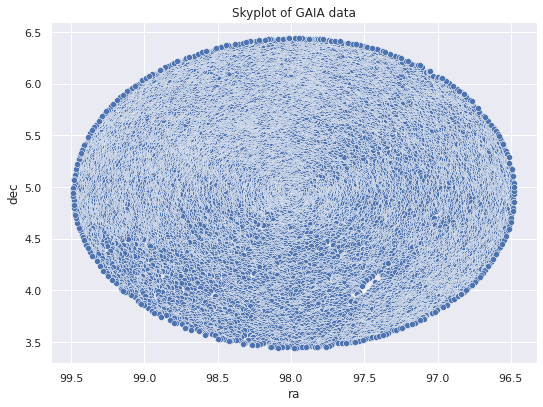

In [10]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [11]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [12]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [13]:
## saving only NGC 2244 data from Cantat GAIA DR2 paper

cantat_2244 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2244")
cantat_2244 = cantat_2244[0].to_pandas()
cantat_2244

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,98.315200,4.536108,3130554284272036992,0.6074,-1.835,0.051,NaN,17.322500,2.3604,0.6,NGC_2244,98.315208,4.536108
1,98.457159,4.534730,3130556139698030848,0.6572,-1.377,0.032,NaN,15.034100,1.6524,0.9,NGC_2244,98.457165,4.534730
2,98.514262,4.569089,3130558166922576512,0.8257,-1.220,0.288,NaN,16.164101,2.0843,0.7,NGC_2244,98.514267,4.569088
3,98.506642,4.544843,3130556582078192256,0.6101,-1.558,-0.133,NaN,17.848499,2.5816,0.5,NGC_2244,98.506649,4.544844
4,98.248545,4.614187,3130555830460261632,0.2582,-0.307,1.344,NaN,16.274500,1.5222,0.1,NGC_2244,98.248546,4.614181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,97.838267,5.516140,3131975093817653760,0.8877,-1.589,0.239,NaN,14.896100,1.0744,0.5,NGC_2244,97.838274,5.516139
1697,97.711034,5.528785,3131977219820275200,0.8216,-0.366,-0.363,NaN,17.707899,1.8032,0.1,NGC_2244,97.711036,5.528787
1698,97.914338,5.590792,3131981381649718656,0.2708,-0.357,0.033,NaN,16.165501,1.6858,0.2,NGC_2244,97.914339,5.590792
1699,97.787003,5.521287,3131975467473614848,0.4338,-0.547,-0.545,NaN,17.078899,1.5405,0.2,NGC_2244,97.787005,5.521289


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_2244 = cantat_2244.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_2244 = cantat_2244.loc[:,['source_id', 'PMemb']]


In [16]:
# join the two table on source_id
cantat_2244 = all_stars_filtered.join(cantat_2244.set_index('source_id'), on='source_id')

In [17]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2244 = cantat_2244.dropna(subset=['PMemb'])
cantat_2244

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
2,1635721458409799680,Gaia DR2 3131335693444047232,3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000,31,False,166.407257,1.705829,0.014366,-0.287584,...,6.575248,1.162213,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305806,-2.069510,98.376277,-18.264650,100001,8515.000000,8277.333008,8597.000000,0.5730,0.337,0.7991,0.295,0.1819,0.3931,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002457,21.921320,7.078063,0.3
3,1635721458409799680,Gaia DR2 3131335689146178304,3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,11.434020,1.203961,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.308368,-2.072129,98.375289,-18.268190,100001,7718.000000,7304.000000,7951.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,https://gea.esac.esa.int/data-server/datalink/...,,0.002491,15.854069,4.291714,0.8
4,1635721458409799680,Gaia DR2 3131335689146178432,3131335689146178432,1113990004,2015.5,97.978022,0.054505,4.944013,0.053738,0.719417,0.072335,9.945561,-1.792722,0.099831,0.151008,0.087104,-0.497630,0.519896,0.282432,0.008323,-0.551685,-0.340607,-0.151437,0.493580,0.199681,-0.301637,105,105,105,0,-0.781199,88.736984,0.000000,0.000000,31,True,296.403778,1.616745,0.012628,-0.256590,...,11.872676,1.215598,0,0.777658,0.301790,0.475868,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.303263,-2.071900,98.372746,-18.263690,100001,6078.666504,5747.250000,6812.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.641788,2.899894,4.073907,16.313883,14.237319,18.390446,https://gea.esac.esa.int/data-server/datalink/...,,0.002617,17.957492,1.733659,1.0
9,1635721458409799680,Gaia DR2 3131336067106995456,3131336067106995456,1515459031,2015.5,97.979989,0.093496,4.946398,0.096162,0.672046,0.117175,5.735424,-1.566294,0.164868,0.460800,0.161481,0.111598,0.344430,0.600307,0.514292,-0.586456,0.182513,0.300952,0.312655,0.156973,0.259249,77,0,76,1,0.641905,78.213913,0.110444,0.522749,31,False,8.700544,1.425404,0.021043,-0.115310,...,14.852393,1.425420,0,1.718152,0.735584,0.982568,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.302049,-2.069061,98.374660,-18.261194,102001,4132.000000,3928.000000,4292.007324,NaN,NaN,NaN,NaN,NaN,NaN

In [18]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2244.to_csv('NGC_2244_cantat.csv')
# all_stars.to_csv('NGC_2244_Gaia_30m.csv')

In [19]:
cantat_2244.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,1.192000e+03,1.192000e+03,1.192000e+03,1192.0,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.0,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,...,1.188000e+03,1188.000000,1188.000000,1188.000000,1188.000000,1192.000000,1188.000000,1188.000000,1188.000000,12.000000,12.000000,1192.000000,12.000000,12.000000,12.0,1192.000000,1192.000000,1192.000000,1192.000000,885.000000,885.000000,885.000000,885.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,547.0,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,1.635721e+18,3.131432e+18,8.437213e+08,2015.5,98.077214,0.071412,4.991822,0.073501,0.579748,0.086438,8.596297,-1.381798,0.140562,0.133382,0.131510,-0.236802,0.123819,-0.131680,0.217343,-0.388904,0.080544,-0.288635,0.233442,0.132491,-0.191567,131.493289,9.543624,130.804530,0.688758,1.319927,158.504761,0.098093,1.284235,31.0,32.655998,1.473471,0.018308,-0.101388,15.002517,10.116611,...,9.221884e+04,329.938770,311.315918,14.911338,1.374865,0.046980,1.519156,0.659795,0.859361,59.279032,2.803816,0.046980,4916.666504,3.208333,0.0,206.306355,-1.962117,98.473673,-18.209923,100213.476836,4804.035645,4594.033691,5107.881348,1.614636,1.305683,1.925702,0.808732,0.647713,0.968972,200111.0,3.207659,2.862141,3.473388,21.798128,18.803234,24.793013,0.368029,12.573117,5.547250,0.491946
std,0.000000e+00,3.372088e+14,4.917316e+08,0.0,0.268451,0.033019,0.291739,0.034912,0.158728,0.041923,5.409497,0.680287,0.065145,0.704449,0.062743,0.168544,0.199067,0.226442,0.192567,0.185813,0.221878,0.202728,0.154654,0.148777,0.181453,16.938273,32.336052,16.875786,1.119077,3.743587,118.433357,0.153231,4.787823,0.0,73.282356,0.096846,0.008636,0.088005,1.902094,0.855069,...,8.064698e+05,2948.184371,244.388138,1.585821,0.129144,0.223267,0.499010,0.273899,0.243613,29.099952,4.883349,0.487776,468.718475,0.450168,0.0,0.287438,0.272227,0.281692,0.291592,616.571194,1007.740051,986.924988,1018.776550,0.696280,0.702955,0.722398,0.355923,0.353712,0.374816,0.0,3.839483,3.461190,4.113063,158.523682,138.478699,178.614380,0.182051,9.489415,5.501464,0.283914
min,1.635721e+18,3.130523e+18,5.011500e+05,2015.5,97.337395,0.021028,4.306968,0.021057,0.251660,0.022887,3.000489,-3.448733,0.040685,-1.780996,0.036940,-0.951144,-0.653522,-0.900410,-0.915744,-0.866931,-0.910124,-0.939732,-0.418813

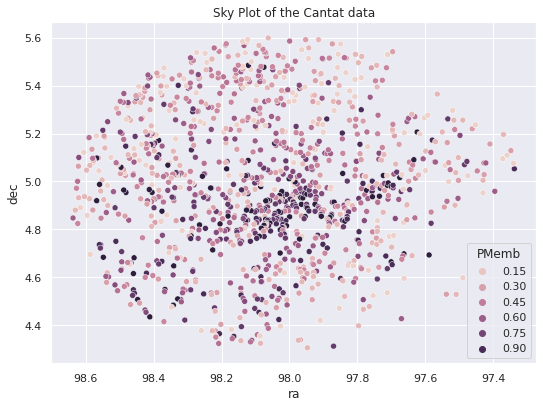

In [20]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_2244['ra'], y = cantat_2244['dec'], 
                          hue = cantat_2244['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [21]:
# import member dataset
member = cantat_2244.copy()

In [22]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_2244_center'] = distance

In [23]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_2244_center)
cantat_radius

0.6667610731136591

In [24]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
2,1635721458409799680,Gaia DR2 3131335693444047232,3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000,31,False,166.407257,1.705829,0.014366,-0.287584,...,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305806,-2.069510,98.376277,-18.264650,100001,8515.000000,8277.333008,8597.000000,0.573,0.337,0.7991,0.295,0.1819,0.3931,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002457,21.921320,7.078063,0.3,0.002460,1
3,1635721458409799680,Gaia DR2 3131335689146178304,3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.308368,-2.072129,98.375289,-18.268190,100001,7718.000000,7304.000000,7951.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,https://gea.esac.esa.int/data-server/datalink/...,,0.002491,15.854069,4.291714,0.8,0.002499,1
4,1635721458409799680,Gaia DR2 3131335689146178432,3131335689146178432,1113990004,2015.5,97.978022,0.054505,4.944013,0.053738,0.719417,0.072335,9.945561,-1.792722,0.099831,0.151008,0.087104,-0.497630,0.519896,0.282432,0.008323,-0.551685,-0.340607,-0.151437,0.493580,0.199681,-0.301637,105,105,105,0,-0.781199,88.736984,0.000000,0.000000,31,True,296.403778,1.616745,0.012628,-0.256590,...,0,0.777658,0.301790,0.475868,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.303263,-2.071900,98.372746,-18.263690,100001,6078.666504,5747.250000,6812.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.641788,2.899894,4.073907,16.313883,14.237319,18.390446,https://gea.esac.esa.int/data-server/datalink/...,,0.002617,17.957492,1.733659,1.0,0.002608,1
9,1635721458409799680,Gaia DR2 3131336067106995456,3131336067106995456,1515459031,2015.5,97.979989,0.093496,4.946398,0.096162,0.672046,0.117175,5.735424,-1.566294,0.164868,0.460800,0.161481,0.111598,0.344430,0.600307,0.514292,-0.586456,0.182513,0.300952,0.312655,0.156973,0.259249,77,0,76,1,0.641905,78.213913,0.110444,0.522749,31,False,8.700544,1.425404,0.021043,-0.115310,...,0,1.718152,0.735584,0.982568,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.302049,-2.069061,98.374660,-18.261194,102001,4132.000000,3928.000000,4292.007324,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-s

In [25]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_2244_center'] = distance

In [26]:
non_member = all_stars_filtered[all_stars_filtered['dist_2244_center'] >= 1.4].sample(len(member), random_state = 42)

In [27]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_2244_center,member
207850,1635721458409799680,Gaia DR2 3131232201912240000,3131232201912240000,1276354635,2015.5,96.641922,0.025431,4.394827,0.026021,0.800484,0.029869,26.799685,-0.593897,0.048940,2.559744,0.043655,-0.011233,0.023070,-0.146277,0.274353,-0.347314,0.167850,-0.371373,0.271717,0.128960,0.003479,140,0,140,0,-4.969581,68.275322,0.000000,0.000000,31,False,55.937977,1.526929,0.008042,0.045530,...,1.244344,0,1.212957,0.534144,0.678813,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.174912,-3.506643,97.000838,-18.883186,100001,4915.00000,4871.000000,5013.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.366543,2.27492,2.409490,2.944541,2.677665,3.211417,https://gea.esac.esa.int/data-server/datalink/...,,1.440628,12.135155,58.636288,1.441096,0
226050,1635721458409799680,Gaia DR2 3131065041786876544,3131065041786876544,1171307243,2015.5,99.436841,0.108608,5.283854,0.119914,0.642591,0.147598,4.353644,4.083902,0.210787,8.141384,0.180083,-0.131357,0.057295,-0.199389,0.160253,-0.508523,-0.030929,-0.379903,0.311449,0.145770,-0.026538,112,0,112,0,1.273919,125.993828,0.045901,0.026515,31,False,1.879764,1.501180,0.031695,-0.068556,...,1.312148,0,1.625889,0.758091,0.867798,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.670073,-0.625435,99.875253,-17.832511,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,1.491647,19.374548,45.209054,1.491271,0
209415,1635721458409799680,Gaia DR2 3131934682466024320,3131934682466024320,353602561,2015.5,98.796631,0.063149,6.135895,0.061494,0.536801,0.069368,7.738493,-2.192603,0.120307,-1.669169,0.105950,-0.217776,0.043666,-0.150585,0.391739,-0.261223,0.289667,-0.369770,0.256348,0.026681,-0.115605,151,0,148,3,1.722089,173.385803,0.216611,2.054410,31,False,4.896860,1.563479,0.016799,-0.067519,...,1.263884,0,1.089951,0.440157,0.649794,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,205.620505,-0.799663,99.150026,-17.024415,100001,5008.00000,4920.000000,5201.009766,0.7663,0.5492,0.885,0.3812,0.2747,0.443,200111,1.231345,1.14165,1.275787,0.859234,0.624602,1.093866,https://gea.esac.esa.int/data-server/datalink/...,,1.445054,18.225129,15.754347,1.444574,0
198070,1635721458409799680,Gaia DR2 3131081942478641536,3131081942478641536,1567432822,2015.5,99.306203,0.063202,5.439551,0.064408,0.453039,0.076332,5.935106,0.870684,0.122619,-2.335931,0.118619,-0.216880,0.045493,-0.225066,0.263270,-0.309778,0.126130,-0.388538,0.337966,0.165217,-0.181967,146,0,144,2,-1.527690,114.465820,0.000000,0.000000,31,False,4.462971,1.555900,0.020364,-0.147049,...,1.255390,0,1.175141,0.500509,0.674632,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.472029,-0.669508,99.727875,-17.686020,100001,4885.15332,4805.609863,4952.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,ht

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


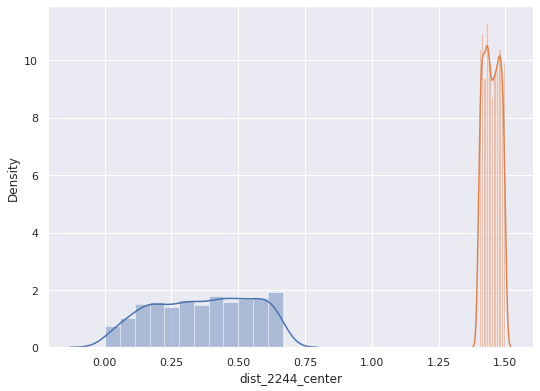

In [28]:
sns.distplot(member['dist_2244_center'])
sns.distplot(non_member['dist_2244_center'])
plt.show()

In [29]:
training_data = pd.concat([member, non_member])

In [30]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
count,2.384000e+03,2.384000e+03,2.384000e+03,2384.0,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.00000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.0,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,...,2373.000000,2373.000000,2373.000000,2384.000000,2373.000000,2373.000000,2373.000000,65.000000,65.000000,2384.000000,65.000000,65.000000,65.000000,2384.000000,2384.000000,2384.000000,2384.000000,1770.000000,1770.000000,1770.000000,1770.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,2384.000000,2384.000000,2384.000000,1192.000000,2384.000000,2384.000000
mean,1.635721e+18,3.138502e+18,8.567692e+08,2015.5,97.998449,0.069400,5.049259,0.071141,0.720463,0.083249,11.411759,-0.634277,0.135683,-1.348281,0.125897,-0.208690,0.102162,-0.156169,0.235938,-0.383583,0.106136,-0.314150,0.229443,0.131963,-0.166745,134.374161,8.95302,133.661913,0.712248,1.042182,156.849854,0.084485,1.168821,31.0,32.171001,1.484343,0.018132,-0.085735,15.345218,10.221896,...,331.947327,15.002186,1.332114,0.047819,1.469012,0.654917,0.814093,38.049159,2.856520,0.124161,5350.000000,3.469231,-0.053846,206.218763,-2.005052,98.387044,-18.155322,100119.689831,4829.753906,4640.161133,5115.707520,1.207519,0.954464,1.486437,0.602740,0.473582,0.742785,200111.0,2.755899,2.466647,2.971770,13.350889,11.485573,15.216228,0.908770,17.257769,23.537106,0.491946,0.908718,0.500000
std,0.000000e+00,3.632737e+16,4.957846e+08,0.0,0.772385,0.033394,0.729201,0.035008,0.668184,0.041806,13.566732,2.892334,0.065290,4.928376,0.061961,0.169969,0.180542,0.193068,0.166812,0.167436,0.194907,0.171432,0.137198,0.129294,0.171707,16.753354,32.10175,16.704455,1.136249,3.741116,126.817001,0.146368,5.391469,0.0,73.830917,0.088534,0.008881,0.088205,1.888731,0.801702,...,248.408997,1.545057,0.112921,0.230445,0.463356,0.261819,0.217771,28.970520,4.262891,0.781460,713.705139,0.605166,0.266972,0.694104,0.801586,0.803429,0.735470,472.584515,869.660767,856.205383,876.677979,0.759684,0.721262,0.813051,0.383815,0.360179,0.414341,0.0,3.534279,3.169960,3.798726,111.338440,97.242546,125.472191,0.556337,25.846700,52.591078,0.283914,0.556292,0.500105
min,1.635721e+18,3.130142e+18,5.011500e+05,2015.5,96.475575,0.018944,3.448579,0.019158,0.116805,0.021425,3.000489,-21.446020,0.036081,-125.341595,0.033084,-0.951144,-0.653522,-0.900410,-0.915744,-0.870776,-0.910124,-0.939732,-0.431626,-

In [31]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [32]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,2384.000000,2384.000000,2384.000000
mean,0.720463,-0.634278,-1.348281
std,0.668184,2.892333,4.928375
min,0.116805,-21.446020,-125.341599
25%,0.449193,-1.763415,-1.761250
50%,0.603141,-0.997774,-0.219353
75%,0.752808,0.071805,0.457115
max,17.121641,51.223972,21.352913


In [33]:
targets.value_counts()

1    1192
0    1192
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


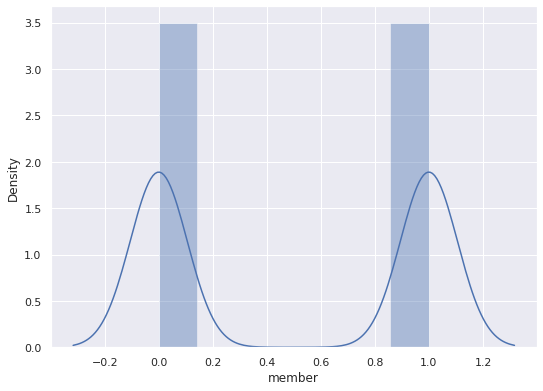

In [34]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

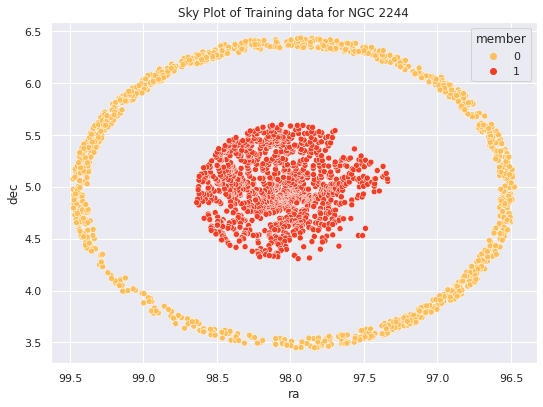

In [35]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 2244')
plt.show()

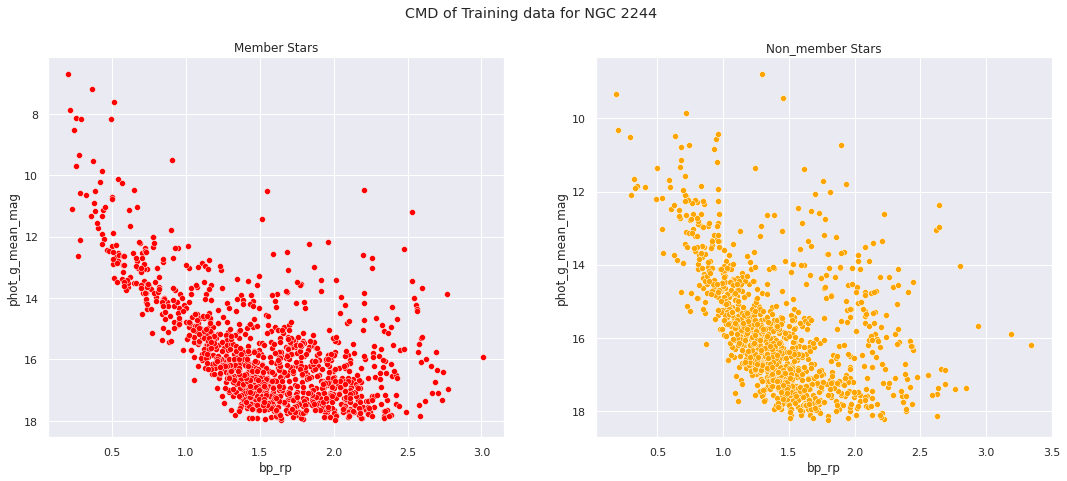

In [36]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 2244 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


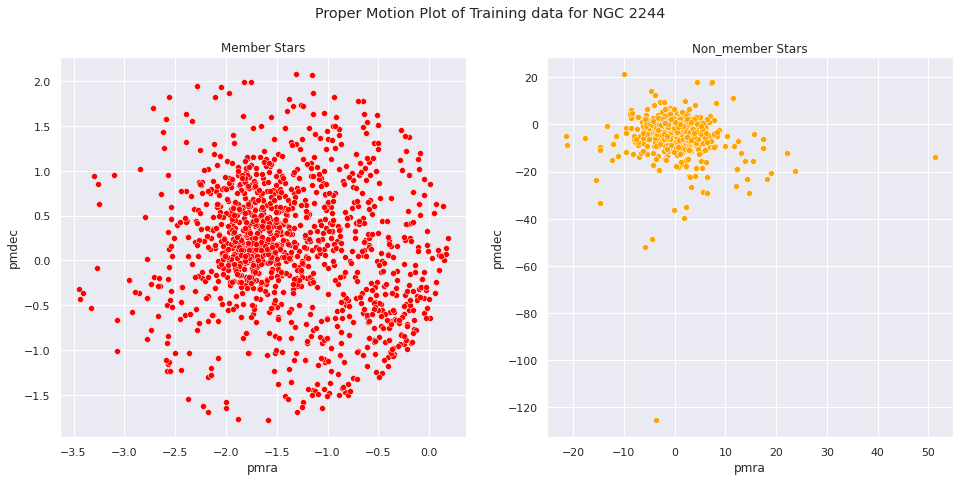

In [37]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 2244 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


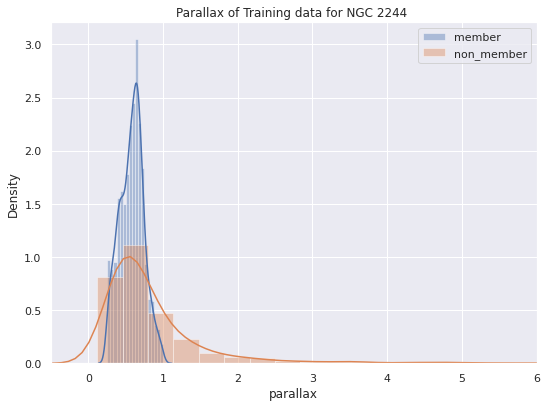

In [38]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 2244 ')
plt.legend()
plt.show()

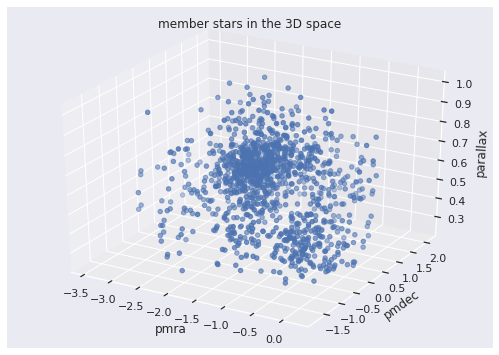

In [39]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


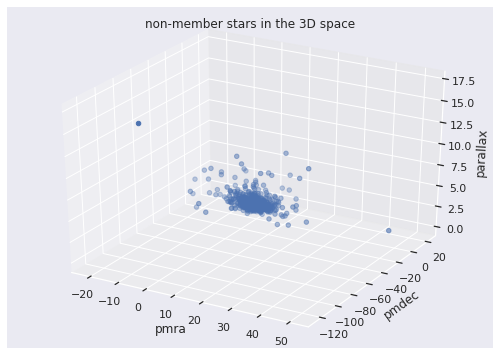

In [40]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [41]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.395452
pmdec       0.392374
parallax    0.212174
dtype: float64

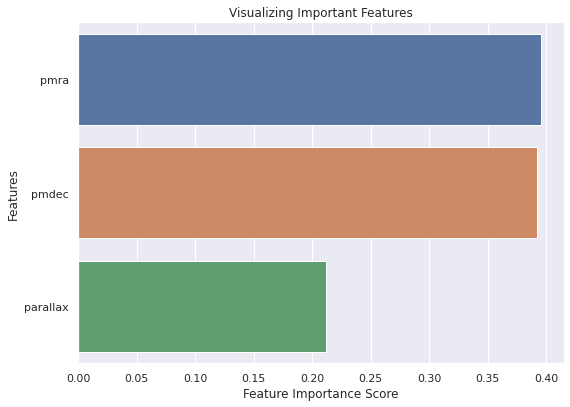

In [43]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [46]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [48]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [49]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.881
Accuracy on test data: 0.915


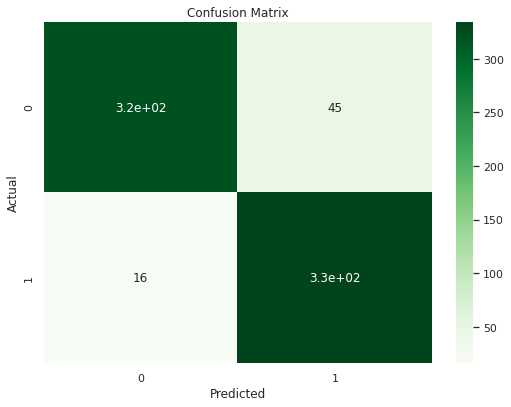

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       366
           1       0.88      0.95      0.92       350

    accuracy                           0.91       716
   macro avg       0.92      0.92      0.91       716
weighted avg       0.92      0.91      0.91       716



In [51]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.878
Accuracy on test data: 0.918


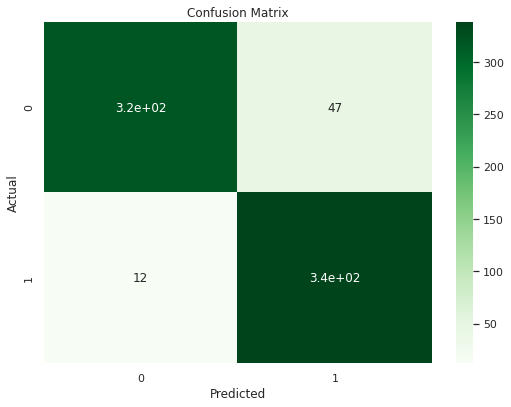

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       366
           1       0.88      0.97      0.92       350

    accuracy                           0.92       716
   macro avg       0.92      0.92      0.92       716
weighted avg       0.92      0.92      0.92       716



In [52]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [53]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_2244_center
count,3.455400e+04,3.455400e+04,3.455400e+04,34554.0,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.0,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,34554.000000,...,3.438100e+04,3.438100e+04,34381.000000,34381.000000,34380.000000,34554.000000,34380.000000,34382.000000,34381.000000,1214.000000,1214.000000,34554.000000,1214.000000,1214.000000,1214.000000,34554.000000,34554.000000,34554.000000,34554.000000,25744.000000,25744.000000,25744.000000,25744.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,17627.0,17627.000000,17627.000000,17627.000000,17627.000000,17627.000000,17627.000000,34554.000000,34554.000000,34554.000000,34554.000000
mean,1.635721e+18,3.133437e+18,8.517136e+08,2015.5,98.002260,0.069168,5.099873,0.071132,0.910610,0.083715,14.692669,0.065549,0.135685,-2.982707,0.126174,-0.197960,0.100727,-0.158963,0.227506,-0.395574,0.100117,-0.314498,0.216563,0.146208,-0.164385,134.816808,7.758291,134.103780,0.713029,0.856947,154.842712,0.084564,1.172951,31.0,29.877991,1.485793,0.018047,-0.080496,15.386294,10.247757,...,5.684561e+04,2.475723e+02,354.862457,15.055686,1.308360,0.057099,1.469359,0.673215,0.796127,30.348235,2.327399,0.161400,5363.303223,3.489292,-0.083402,206.175585,-1.978319,98.388047,-18.104565,100042.856200,4816.737305,4641.306641,5090.206543,0.972093,0.750499,1.225638,0.483589,0.371181,0.611804,200111.0,2.215093,1.986034,2.386920,6.586314,5.660066,7.512562,1.019412,25.351417,44.261457,1.019361
std,0.000000e+00,1.962034e+16,4.893758e+08,0.0,0.772521,0.034595,0.743377,0.036508,0.962729,0.043855,18.784094,6.037886,0.067417,7.910218,0.063709,0.166764,0.168938,0.176438,0.158847,0.164023,0.178040,0.154894,0.138696,0.121540,0.167444,16.386801,30.630258,16.328773,1.142907,3.812512,142.243698,0.145531,5.785640,0.0,69.931160,0.084366,0.009183,0.081155,1.833107,0.778921,...,1.034585e+06,9.853214e+03,259.296539,1.500648,0.094770,0.248186,0.465203,0.278953,0.199020,30.665858,2.987111,0.911931,689.597595,0.644186,0.331587,0.714267,0.796994,0.804859,0.748168,286.109579,762.584229,754.830994,771.974426,0.748278,0.706922,0.796414,0.375926,0.352537,0.403991,0.0,3.885243,3.465885,4.242089,62.557579,54.057377,71.213455,0.362212,58.460779,91.590520,0.362184
min,1.635721e+18,3.130140e+18,1.130840e+05,2015.5,96.475342,0.018101,3.445924,0.017791,0.090841,0.020042,3

In [54]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_2244_center'] <= cantat_radius*2]

In [55]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [56]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [57]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [58]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    21911
1     3043
Name: member, dtype: int64

In [59]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

3051

In [60]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

3043

In [61]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_2244_center,member,PMemb
count,3.043000e+03,3.043000e+03,3.043000e+03,3043.0,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.0,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,...,3030.000000,3030.000000,3030.000000,3043.000000,3030.000000,3031.000000,3030.000000,56.000000,56.000000,3043.000000,56.000000,56.000000,56.000000,3043.000000,3043.000000,3043.000000,3043.000000,2284.000000,2284.000000,2284.000000,2284.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,1189.0,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.0,3043.000000
mean,1.635721e+18,3.131483e+18,8.423829e+08,2015.5,98.173116,0.069722,5.215308,0.071325,0.525640,0.084472,7.910608,-1.177819,0.137772,0.056955,0.128737,-0.188620,0.099640,-0.144146,0.210769,-0.405623,0.089129,-0.299259,0.198803,0.166234,-0.174750,134.274400,4.963851,133.601709,0.672691,0.982987,157.203751,0.088477,1.275403,31.0,22.380585,1.480116,0.018138,-0.080160,15.326651,10.282287,...,324.976288,15.172534,1.314616,0.060467,1.517750,0.703672,0.813910,46.698759,1.959705,0.075583,4991.964355,3.160714,-0.107143,206.151635,-1.774127,98.559699,-17.979570,100027.334939,4736.334961,4551.116699,5034.412109,1.654810,1.381009,1.947747,0.827839,0.686541,0.979842,200111.0,3.209456,2.829398,3.468236,9.683683,8.077963,11.289403,1.011960,10.890810,7.199129,1.011886,1.0,0.811050
std,0.000000e+00,5.156353e+14,4.869902e+08,0.0,0.723860,0.032803,0.665692,0.034180,0.165733,0.040811,5.284147,0.768679,0.064186,0.848687,0.061089,0.170556,0.166934,0.171123,0.160982,0.155012,0.168323,0.150635,0.143029,0.118891,0.170838,16.099623,24.851578,16.049718,1.084831,3.870786,150.020187,0.142368,5.776746,0.0,56.318237,0.086702,0.008783,0.077403,1.790958,0.758150,...,224.754211,1.349481,0.089120,0.251801,0.499970,0.306360,0.202536,28.921756,2.468045,0.600957,665.430542,0.745332,0.346597,0.651642,0.733979,0.754820,0.669275,227.785449,801.803711,787.186707,810.945007,0.725040,0.738793,0.741154,0.367776,0.372597,0.381271,0.0,4.239845,3.733876,4.560941,33.801422,29.137602,38.526596,0.225705,9.500896,6.267417,0.225681,0.0,0.129682
min,1.635721e+18,3.130334e+18,1.275950e+05,2015.5,96.650414,0.020952,3.610109,0.020631,0.248631,0.023252,3.000118,-3.431921,0.039418,-1.755320,0.035787,-0.973839,-0.624156,-0.955504,-0.532716,-0.888028,-0.563285,-0.974185,-0.551404,-0.546003,-0.941647,69.000

In [62]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
count,1.192000e+03,1.192000e+03,1.192000e+03,1192.0,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.0,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,...,1188.000000,1188.000000,1188.000000,1192.000000,1188.000000,1188.000000,1188.000000,12.000000,12.000000,1192.000000,12.000000,12.000000,12.0,1192.000000,1192.000000,1192.000000,1192.000000,885.000000,885.000000,885.000000,885.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,547.0,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.0
mean,1.635721e+18,3.131432e+18,8.437213e+08,2015.5,98.077214,0.071412,4.991822,0.073501,0.579748,0.086438,8.596297,-1.381798,0.140562,0.133382,0.131510,-0.236802,0.123819,-0.131680,0.217343,-0.388904,0.080544,-0.288635,0.233442,0.132491,-0.191567,131.493289,9.543624,130.804530,0.688758,1.319927,158.504761,0.098093,1.284235,31.0,32.655998,1.473471,0.018308,-0.101388,15.002517,10.116611,...,311.315918,14.911338,1.374865,0.046980,1.519156,0.659795,0.859361,59.279032,2.803816,0.046980,4916.666504,3.208333,0.0,206.306355,-1.962117,98.473673,-18.209923,100213.476836,4804.035645,4594.033691,5107.881348,1.614636,1.305683,1.925702,0.808732,0.647713,0.968972,200111.0,3.207659,2.862141,3.473388,21.798128,18.803234,24.793013,0.368029,12.573117,5.547250,0.491946,0.368023,1.0
std,0.000000e+00,3.372088e+14,4.917316e+08,0.0,0.268451,0.033019,0.291739,0.034912,0.158728,0.041923,5.409497,0.680287,0.065145,0.704449,0.062743,0.168544,0.199067,0.226442,0.192567,0.185813,0.221878,0.202728,0.154654,0.148777,0.181453,16.938273,32.336052,16.875786,1.119077,3.743587,118.433357,0.153231,4.787823,0.0,73.282356,0.096846,0.008636,0.088005,1.902094,0.855069,...,244.388138,1.585821,0.129144,0.223267,0.499010,0.273899,0.243613,29.099952,4.883349,0.487776,468.718475,0.450168,0.0,0.287438,0.272227,0.281692,0.291592,616.571194,1007.740051,986.924988,1018.776550,0.696280,0.702955,0.722398,0.355923,0.353712,0.374816,0.0,3.839483,3.461190,4.113063,158.523682,138.478699,178.614380,0.182051,9.489415,5.501464,0.283914,0.182043,0.0
min,1.635721e+18,3.130523e+18,5.011500e+05,2015.5,97.337395,0.021028,4.306968,0.021057,0.251660,0.022887,3.000489,-3.448733,0.040685,-1.780996,0.036940,-0.951144,-0.653522,-0.900410,-0.915744,-0.866931,-0.910124,-0.939732,-0.418813,-0.625654,-0.975644,68.000000,0.000000,66.0000

#### Visualization

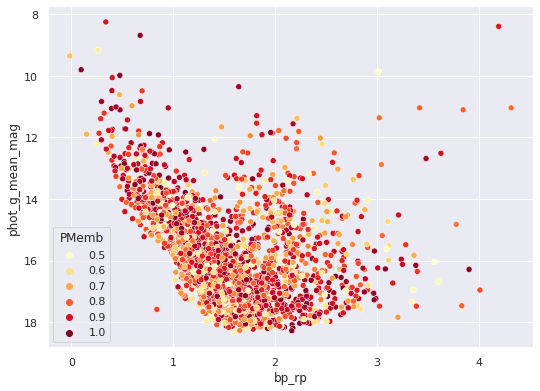

In [63]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

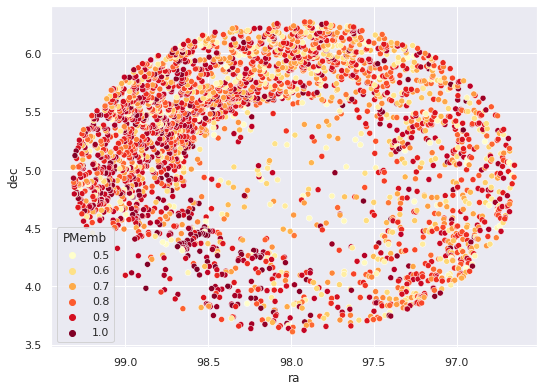

In [64]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

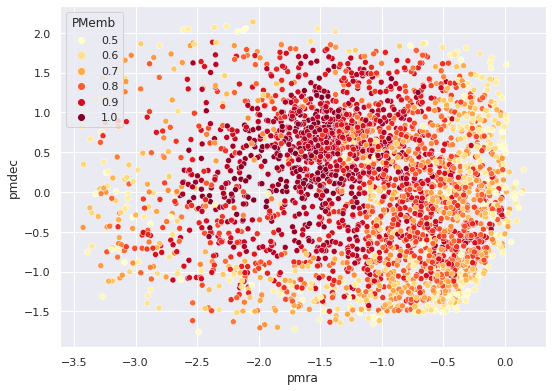

In [65]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


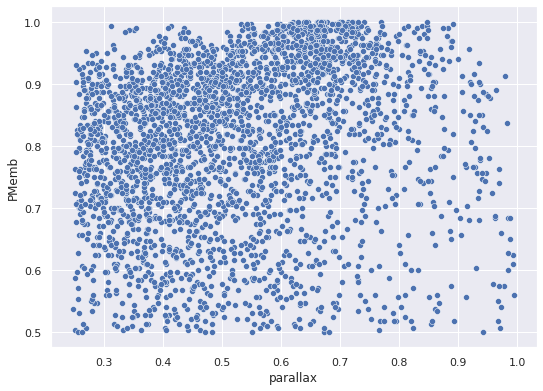

In [66]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [67]:
# saving the files as csv
# all_stars.to_csv('gaia_2244_membership_prob.csv')

potentialMember.to_csv('NGC_2244_membership_prob.csv')


### Comparing the old and new predicted members

In [68]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [69]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_2244_center,member,PMemb
count,4.235000e+03,4.235000e+03,4.235000e+03,4235.0,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.0,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,...,4218.000000,4218.000000,4218.000000,4235.000000,4218.000000,4219.000000,4218.000000,68.000000,68.000000,4235.000000,68.00000,68.000000,68.000000,4235.000000,4235.000000,4235.000000,4235.000000,3169.000000,3169.000000,3169.000000,3169.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1736.0,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.0,4235.000000
mean,1.635721e+18,3.131469e+18,8.427596e+08,2015.5,98.146123,0.070198,5.152405,0.071938,0.540869,0.085025,8.103603,-1.235232,0.138557,0.078466,0.129517,-0.202182,0.106445,-0.140637,0.212620,-0.400917,0.086713,-0.296269,0.208553,0.156736,-0.179484,133.491617,6.252893,132.814404,0.677214,1.077824,157.569977,0.091183,1.277889,31.0,25.272810,1.478246,0.018186,-0.086135,15.235419,10.235655,...,321.128357,15.098981,1.331585,0.056671,1.518148,0.691317,0.826711,48.918807,2.108666,0.067532,4978.67627,3.169118,-0.088235,206.195183,-1.827040,98.535486,-18.044406,100079.318397,4755.242188,4563.104004,5054.931641,1.644358,1.361411,1.942013,0.822867,0.676438,0.977014,200111.0,3.208891,2.839716,3.469859,13.500840,11.457406,15.544290,0.830716,11.364319,6.734185,0.830662,1.0,0.721234
std,0.000000e+00,4.727953e+14,4.882716e+08,0.0,0.631341,0.032868,0.593659,0.034397,0.165571,0.041132,5.328020,0.750412,0.064462,0.811336,0.061564,0.171348,0.176881,0.188399,0.170467,0.164416,0.184984,0.166992,0.147203,0.128888,0.174034,16.385822,27.241464,16.332979,1.094469,3.837963,141.830231,0.145553,5.515804,0.0,61.731636,0.089712,0.008741,0.081082,1.828518,0.790056,...,230.505875,1.424691,0.105518,0.244157,0.499641,0.298200,0.215842,29.138022,3.003426,0.571461,632.76886,0.699735,0.316713,0.577210,0.644246,0.658155,0.597055,387.875901,864.635742,847.773071,874.427124,0.717598,0.730098,0.736084,0.364679,0.368026,0.379477,0.0,4.116794,3.649192,4.423531,93.393173,81.491821,105.335289,0.360281,9.526641,6.106351,0.360245,0.0,0.235278
min,1.635721e+18,3.130334e+18,1.275950e+05,2015.5,96.650414,0.020952,3.610109,0.020631,0.248631,0.022887,3.000118,-3.448733,0.039418,-1.780996,0.035787,-0.973839,-0.653522,-0.955504,-0.915744,-0.888028,-0.910124,-0.974185,-0.551404,-0.625654,-0.975644,

In [70]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
count,1.192000e+03,1.192000e+03,1.192000e+03,1192.0,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.0,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,...,1188.000000,1188.000000,1188.000000,1192.000000,1188.000000,1188.000000,1188.000000,12.000000,12.000000,1192.000000,12.000000,12.000000,12.0,1192.000000,1192.000000,1192.000000,1192.000000,885.000000,885.000000,885.000000,885.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,547.0,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.0
mean,1.635721e+18,3.131432e+18,8.437213e+08,2015.5,98.077214,0.071412,4.991822,0.073501,0.579748,0.086438,8.596297,-1.381798,0.140562,0.133382,0.131510,-0.236802,0.123819,-0.131680,0.217343,-0.388904,0.080544,-0.288635,0.233442,0.132491,-0.191567,131.493289,9.543624,130.804530,0.688758,1.319927,158.504761,0.098093,1.284235,31.0,32.655998,1.473471,0.018308,-0.101388,15.002517,10.116611,...,311.315918,14.911338,1.374865,0.046980,1.519156,0.659795,0.859361,59.279032,2.803816,0.046980,4916.666504,3.208333,0.0,206.306355,-1.962117,98.473673,-18.209923,100213.476836,4804.035645,4594.033691,5107.881348,1.614636,1.305683,1.925702,0.808732,0.647713,0.968972,200111.0,3.207659,2.862141,3.473388,21.798128,18.803234,24.793013,0.368029,12.573117,5.547250,0.491946,0.368023,1.0
std,0.000000e+00,3.372088e+14,4.917316e+08,0.0,0.268451,0.033019,0.291739,0.034912,0.158728,0.041923,5.409497,0.680287,0.065145,0.704449,0.062743,0.168544,0.199067,0.226442,0.192567,0.185813,0.221878,0.202728,0.154654,0.148777,0.181453,16.938273,32.336052,16.875786,1.119077,3.743587,118.433357,0.153231,4.787823,0.0,73.282356,0.096846,0.008636,0.088005,1.902094,0.855069,...,244.388138,1.585821,0.129144,0.223267,0.499010,0.273899,0.243613,29.099952,4.883349,0.487776,468.718475,0.450168,0.0,0.287438,0.272227,0.281692,0.291592,616.571194,1007.740051,986.924988,1018.776550,0.696280,0.702955,0.722398,0.355923,0.353712,0.374816,0.0,3.839483,3.461190,4.113063,158.523682,138.478699,178.614380,0.182051,9.489415,5.501464,0.283914,0.182043,0.0
min,1.635721e+18,3.130523e+18,5.011500e+05,2015.5,97.337395,0.021028,4.306968,0.021057,0.251660,0.022887,3.000489,-3.448733,0.040685,-1.780996,0.036940,-0.951144,-0.653522,-0.900410,-0.915744,-0.866931,-0.910124,-0.939732,-0.418813,-0.625654,-0.975644,68.000000,0.000000,66.0000

In [71]:
concatenated.dataset.value_counts()

New_member    3043
Old_member    1192
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

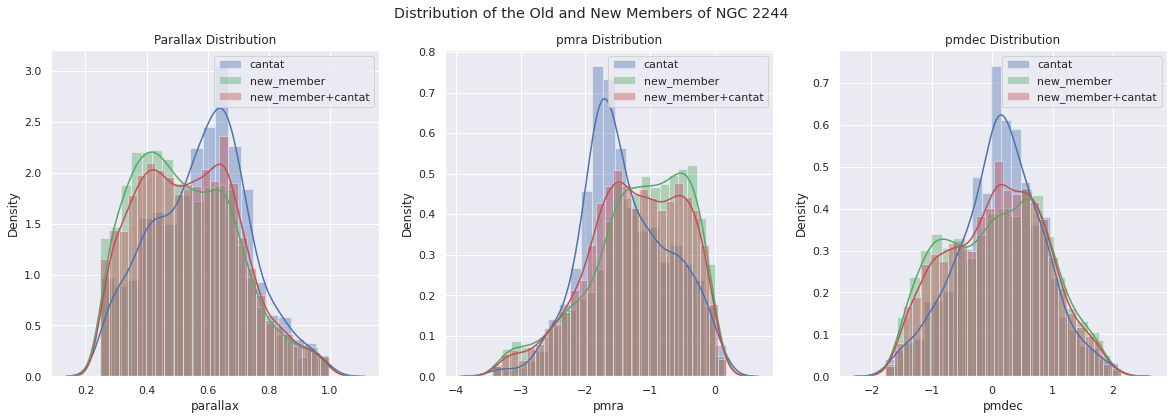

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 2244')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


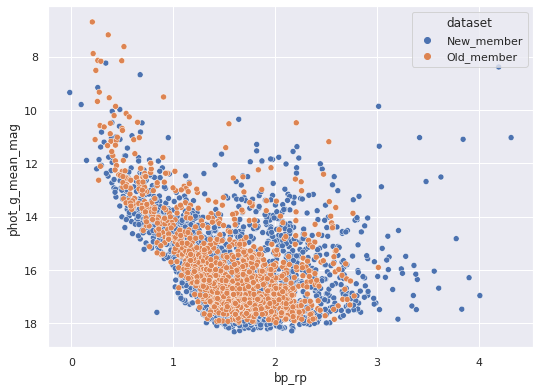

In [73]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

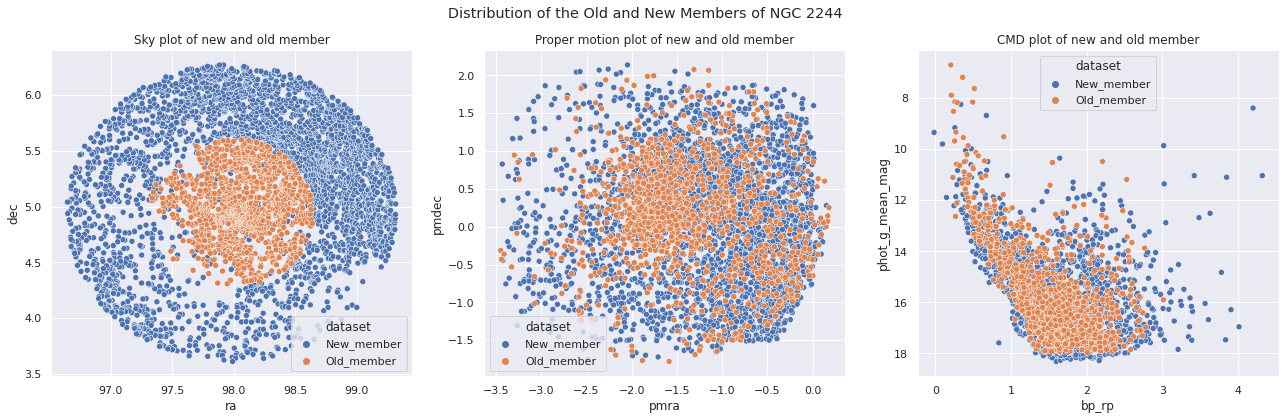

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 2244')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

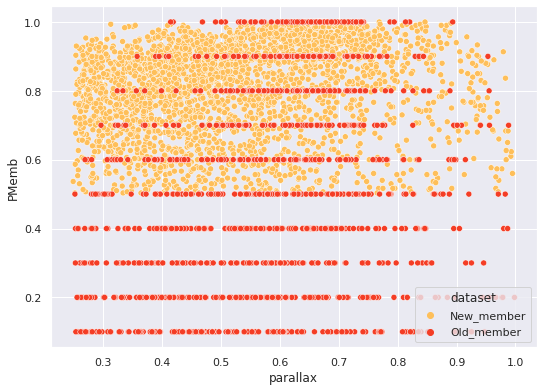

In [75]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [76]:
# pd_prof.ProfileReport(potentialMember)

In [77]:
#files.download('NGC_2244_cantat.csv')

#files.download('NGC_2244_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


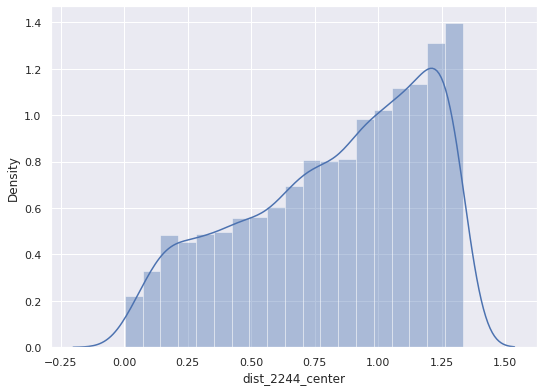

In [78]:
sns.distplot(concatenated['dist_2244_center'])

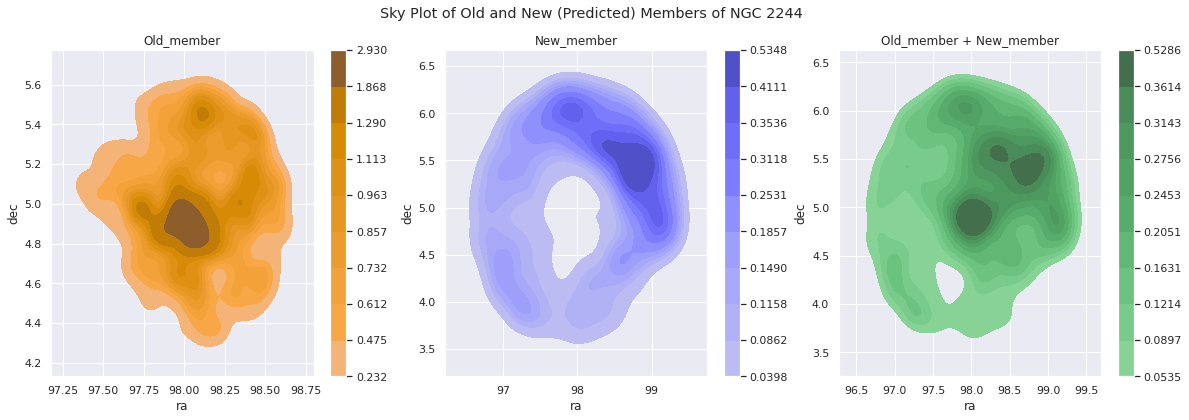

In [79]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 2244')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

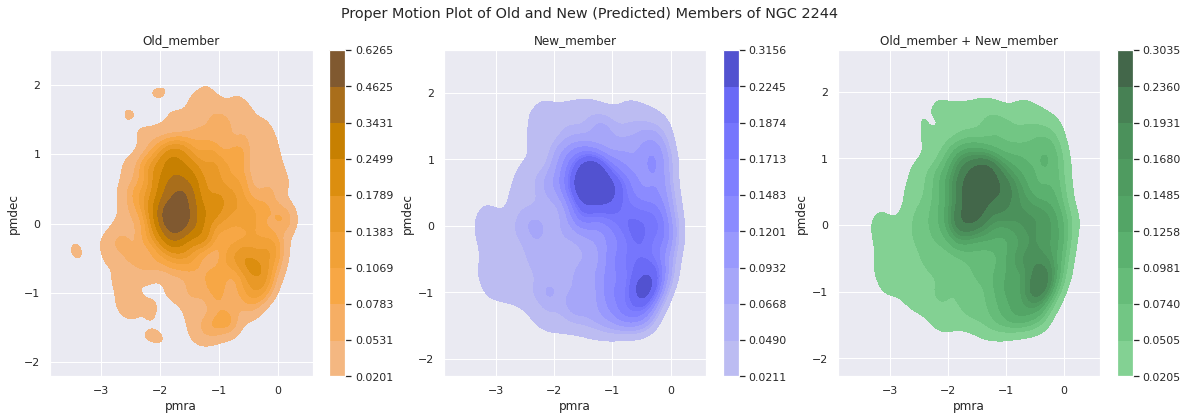

In [80]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 2244')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [81]:
#files.download('NGC_2244_cantat.csv')

potentialMember.to_csv('NGC_2244_additional_member_prob.csv')
concatenated.to_csv('NGC_2244_all_member_prob.csv')

files.download('NGC_2244_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_2244_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>